In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io
from skimage.io import imread_collection
%matplotlib inline

In [2]:
pos_dir = 'ex3_data/positives/positives/*.png'
neg_dir = 'ex3_data/negatives/negatives/*.png'


negatives = imread_collection(neg_dir)
positives = imread_collection(pos_dir)

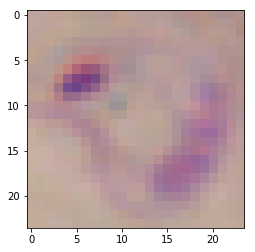

In [3]:
plt.imshow(positives[0])

In [46]:
def extract_features(im):
    im = np.mean(im, axis=2)
    plt.imshow(im)
    hist,_ = np.histogram(im, bins=5, range=None, normed=False, weights=None, density=None)
    features = []
    
    features.append(np.mean(im))
    features.append(np.max(im))
    features.append(np.min(im))
    
    return features

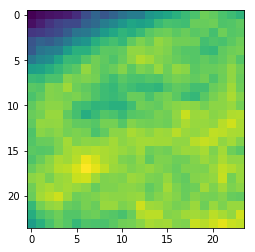

In [47]:
pos_features = [extract_features(i) for i in positives]
neg_features = [extract_features(i) for i in negatives]

In [48]:
pos_features_train = pos_features[7:]
neg_features_train = neg_features[7:]

In [49]:
pos_features_test = pos_features[:7]
neg_features_test = neg_features[:7]

In [50]:
print(len(pos_features_test))
print(len(pos_features_train))

7
23


[131.77372685185185, 153.33333333333334, 114.33333333333333]

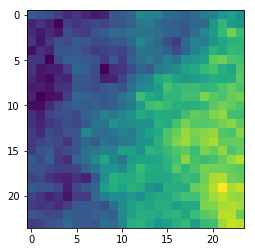

In [51]:
extract_features(negatives[6])

[153.93113425925924, 183.0, 87.0]

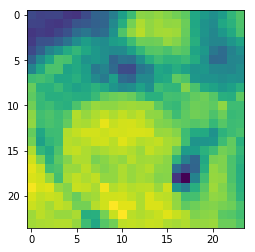

In [52]:
extract_features(positives[6])

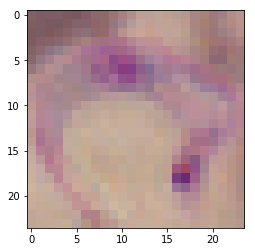

In [53]:
plt.imshow(positives[6])

In [54]:
def mean(features):
    return np.mean(features, axis=0)

In [55]:
mean_pos = mean(pos_features_train)
mean_neg = mean(neg_features_train)

In [56]:
print(mean_pos)
print(mean_neg)

[ 151.38564312  181.11594203   86.52173913]
[ 141.2172655   162.15942029  120.62318841]


In [57]:
def compute_covariance_subroutine(features_mx, mean):
    cov_mx = np.zeros((len(mean), len(mean)))
    vecs = features_mx - mean
    for vec in vecs:
        mx = np.outer(vec, vec)
        cov_mx = cov_mx + mx
    return cov_mx

def compute_covariance_matrix(features_mx1, mean1, features_mx2, mean2):
    cov_mx1 = compute_covariance_subroutine(features_mx1, mean1)
    cov_mx2 = compute_covariance_subroutine(features_mx2, mean2)
    
    return (cov_mx1 + cov_mx2)/(len(features_mx1) + len(features_mx2))

In [58]:
E = compute_covariance_matrix(pos_features_train, mean_pos, neg_features_train, mean_neg)
invE = np.linalg.inv(E)

In [59]:
def compute_probability(features, mean, inv_covariance):
    vec = features - mean
    p = np.dot(vec, inv_covariance)
    p = np.dot(p, vec)
    p = - p/2
    return np.exp(p)

In [62]:
false_negatives = 0
false_positives = 0

bad_pos = []
bad_neg = []

for i in range(len(pos_features_train)):
    pP = compute_probability(pos_features_train[i], mean_pos, invE)
    nP = compute_probability(pos_features_train[i], mean_neg, invE)
    
    if pP < nP:
        false_negatives += 1
        bad_neg.append(i)
        
for i in range(0, len(neg_features_train)):
    pP = compute_probability(neg_features_train[i], mean_pos, invE)
    nP = compute_probability(neg_features_train[i], mean_neg, invE)

    if pP > nP:
        false_positives = false_positives + 1
        bad_pos.append(i)
        
print (false_negatives)
print (false_positives)

0
0


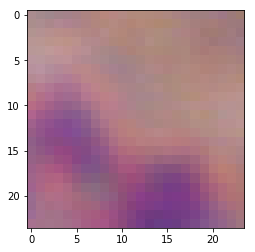

In [45]:
plt.imshow(negatives[bad_pos[0]])

In [61]:
print(E)

[[ 189.10542365  142.07365509  133.18681737]
 [ 142.07365509  157.39361479   85.99495904]
 [ 133.18681737   85.99495904  156.23251418]]
